Ikhwanul Abiyu Dhiyya'ul Haq

5024211048

Pembelajaran Mesin A

Dataset diambil dari https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data, alasan pemilihan dataset ini juga berkaitan dengan mata kuliah pengayaan yang saya ambil di Sistem Informasi, yaitu Manajemen Hubungan Pelanggan / Customer Relationship Management (CRM). Diharapkan dari hasil clustering ini dapat membantu dalam memahami perilaku pelanggan dan memberikan rekomendasi yang tepat. Kode sepenuhnya dari saya dan beberapa bantuan syntaks dari ChatGPT.

In [98]:
import pandas as np
import matplotlib.pyplot as plt
import numpy as pd

In [10]:
df = np.read_csv('dataset/mall_customers.csv')

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0, 0.5, 'Count')

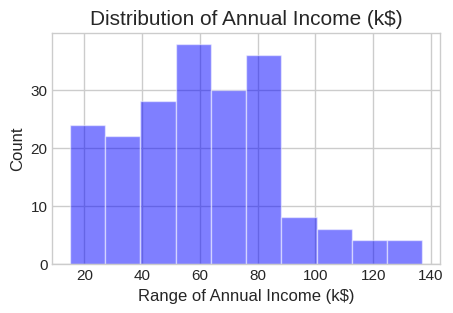

In [60]:
# see distribution of data (annual income)
x = df['Annual Income (k$)'].to_numpy()

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.hist(x, bins=10, color='blue', alpha=0.5)

# plot line 
plt.title('Distribution of Annual Income (k$)', fontsize=15)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

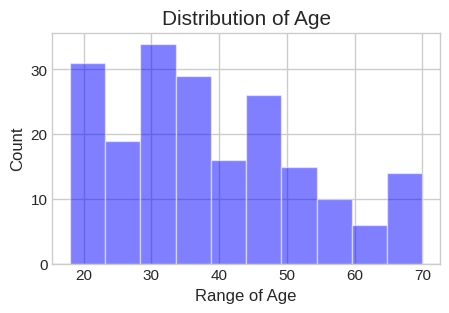

In [61]:
# see distribution of data (annual income)
x = df['Age'].to_numpy()

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.hist(x, bins=10, color='blue', alpha=0.5)

# plot line 
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

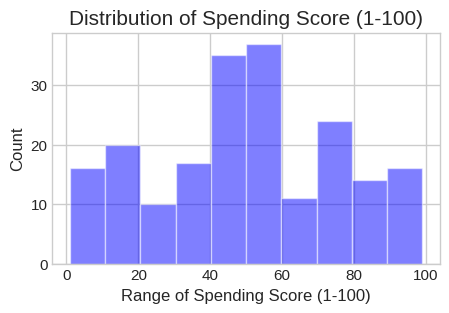

In [62]:
# see distribution of data (annual income)
x = df['Spending Score (1-100)'].to_numpy()

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.hist(x, bins=10, color='blue', alpha=0.5)

# plot line 
plt.title('Distribution of Spending Score (1-100)', fontsize=15)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

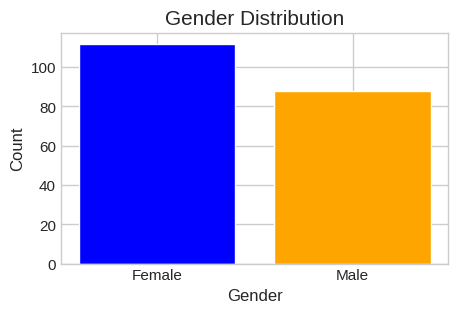

In [83]:
# gender analysis
genders = df['Gender'].value_counts()

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')

plt.bar(genders.index, genders.values, color=['blue', 'orange'])
plt.title('Gender Distribution', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Count')

Cluster pake 2 dulu, asumsinya annual income sama spending score

Text(0, 0.5, 'Spending Score (1-100)')

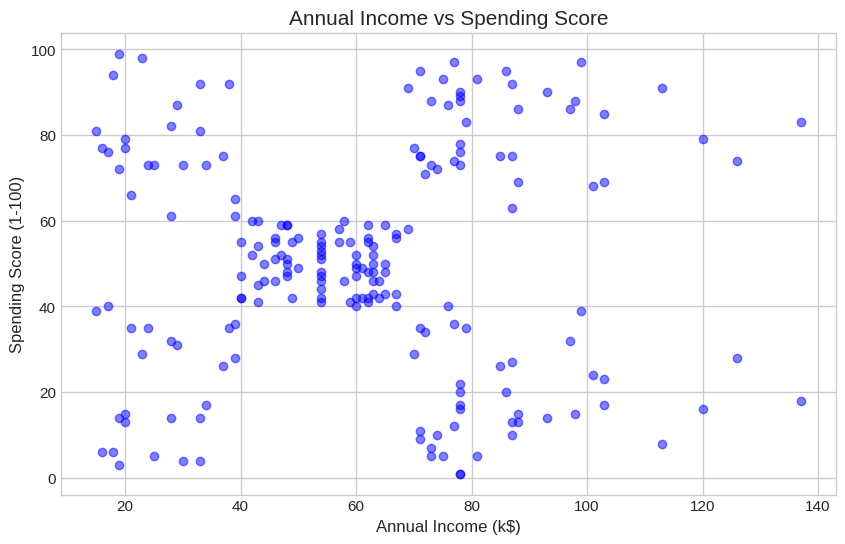

In [87]:
df_annual_income = df['Annual Income (k$)']
df_spending_score = df['Spending Score (1-100)']

plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')
plt.scatter(df_annual_income, df_spending_score, color='blue', alpha=0.5)
plt.title('Annual Income vs Spending Score', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Kita coba pake Kmeans, dimana K = 5, karena sepenglihatan kita pada data bisa dibagi 5

In [89]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

prediction = km.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

df['cluster'] = prediction
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


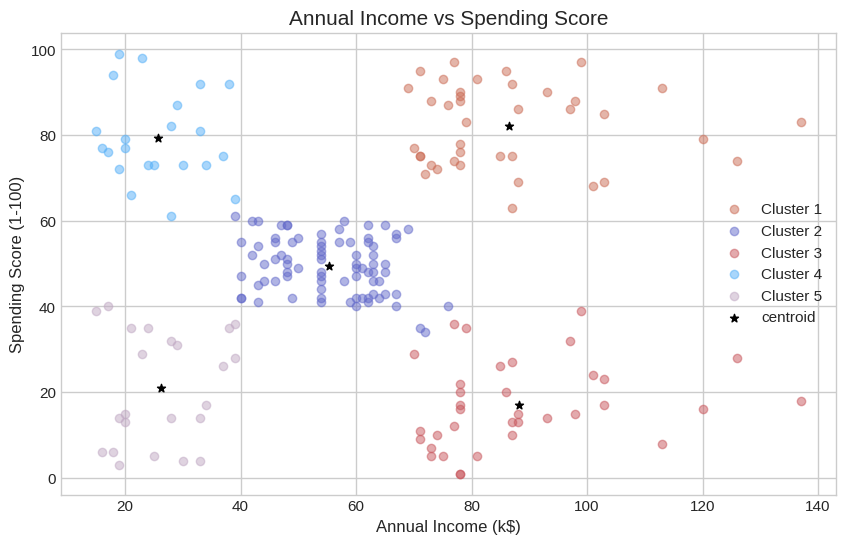

In [94]:
from random import randint

colors = []
for i in range(5):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')

for i in range(5):
    plt.scatter(df[df['cluster'] == i]['Annual Income (k$)'], df[df['cluster'] == i]['Spending Score (1-100)'], color=colors[i], alpha=0.5, label='Cluster {}'.format(i+1))

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.title('Annual Income vs Spending Score', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

apa ini sudah yang terbaik? kita coba pakai k = 1, 2, dst. Kita pakai metode elbow dan silhouette untuk menentukan K yang terbaik

1. Metode Elbow

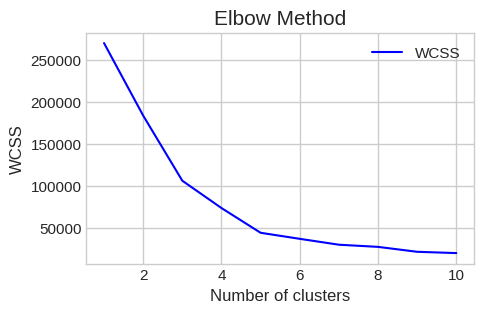

In [96]:
# elbow method
wcss = [] # within cluster sum of squares
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(km.inertia_)

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.plot(range(1,11), wcss, color='blue')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend(['WCSS'])

2. Metode Silhouette

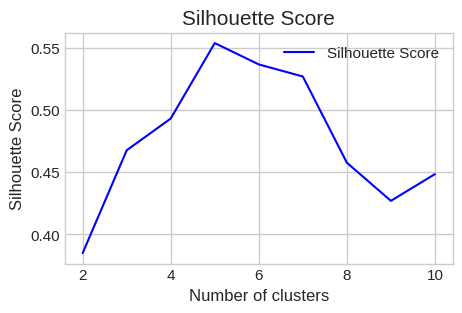

In [97]:
# silhouette score
from sklearn.metrics import silhouette_score

sil = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sil.append(silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], km.labels_))

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.plot(range(2,11), sil, color='blue')
plt.title('Silhouette Score', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend(['Silhouette Score'])

dari keduanya didapatkan paling bagus k = 5, karena silhouette score tertinggi dan elbownya paling tajam

kita coba iseng sekarang parameternya jadi 3, yaitu annual income, spending score, dan age

Text(0.5, 0, 'Age')

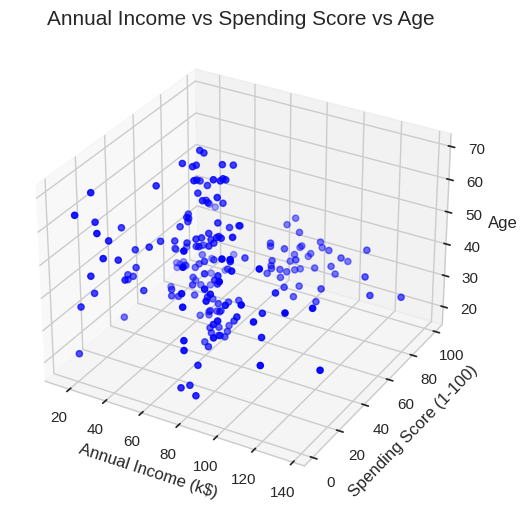

In [110]:
df_annual_income = df['Annual Income (k$)']
df_spending_score = df['Spending Score (1-100)']
df_age = df['Age']

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

ax.scatter3D(df_annual_income, df_spending_score, df_age, color='blue')
plt.title('Annual Income vs Spending Score vs Age', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')

Kita coba cari K efektif terlebih dahulu, dengan metode elbow dan silhouette

1. Metode Elbow

Text(0, 0.5, 'WCSS')

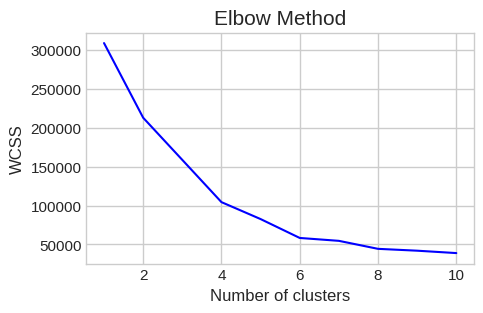

In [138]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
    wcss.append(km.inertia_)

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.plot(range(1,11), wcss, color='blue')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

2. Metode Silhouette

Optimal number of clusters: 6
Highest silhouette score: 0.4523443947724053


Text(0, 0.5, 'Silhouette Score')

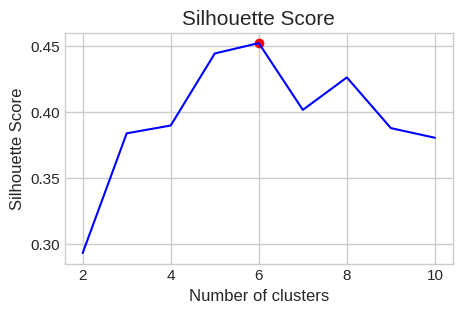

In [166]:
sil = []
for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
    sil.append(silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], km.labels_))

highest_score_index = pd.argmax(sil)
optimal_num_clusters = highest_score_index + 2
highest_score = sil[highest_score_index]

print("Optimal number of clusters:", optimal_num_clusters)
print("Highest silhouette score:", highest_score)

plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.plot(range(2, 11), sil, color='blue')
plt.scatter(optimal_num_clusters, highest_score, color='red', marker='o', label='Optimal number of clusters')
plt.title('Silhouette Score', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


ini tiap run beda-beda, tapi sepertinya K = 6 paling bagus (walaupun silhouette scorenya kadang-kadang terjun bebas)

oke kalau gitu mari kita buat algoritmanya kalau k optimal nya ganti

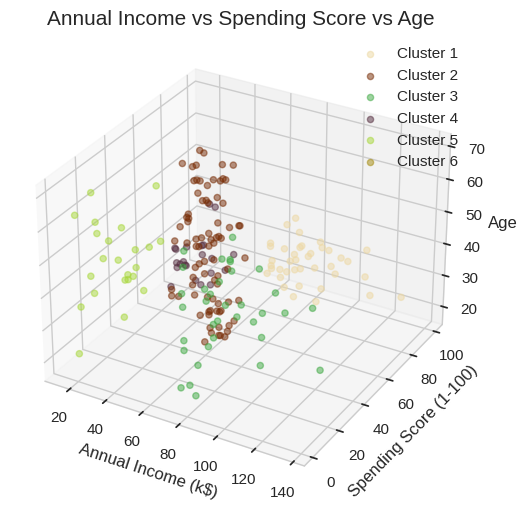

In [170]:
from random import randint

colors = []
for i in range(optimal_num_clusters):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

for i in range(optimal_num_clusters):
    ax.scatter3D(df[df['cluster'] == i]['Annual Income (k$)'], df[df['cluster'] == i]['Spending Score (1-100)'], df[df['cluster'] == i]['Age'], color=colors[i], alpha=0.5, label='Cluster {}'.format(i+1))

plt.title('Annual Income vs Spending Score vs Age', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.legend()

jujur agak susah dilihat, tapi namanya mencoba, jadi tidak ada salahnya.